# TP DATA COVID 
## REALISER PAR :
### SOUSSANE Khalil
## ENCADRE PAR : 
### GHAZDALI Abdelghani

on va importer les bibliotheques 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
#reading data
data=pd.read_csv("Data Covid.csv",index_col=0)
data

,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,,
1,9,2021-01-03,0,0,NaN,NaN,NaN,21,0
44,9,2021-04-01,1,0,1.0,0.0,0.0,230,1
75,19,2021-04-14,2,1,0.0,0.0,1.0,115,0
4,19,2021-03-02,0,0,NaN,NaN,NaN,34,1
52,39,2021-04-04,22,4,18.0,0.0,0.0,431,3
...,...,...,...,...,...,...,...,...,...
6,49,2021-01-14,0,0,NaN,NaN,NaN,78,7
44,0,2021-05-08,2162,429,1202.0,509.0,22.0,35589,9810
53,49,2020-12-24,14,3,NaN,NaN,NaN,228,3


on va voir que les donnees n'est pas nettoyer

In [3]:
data.isnull()

,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,,
1,False,False,False,False,True,True,True,False,False
44,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,False,False
52,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6,False,False,False,False,True,True,True,False,False
44,False,False,False,False,False,False,False,False,False
53,False,False,False,False,True,True,True,False,False


In [4]:
data.head()

,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,,
1,9,2021-01-03,0,0,NaN,NaN,NaN,21,0
44,9,2021-04-01,1,0,1.0,0.0,0.0,230,1
75,19,2021-04-14,2,1,0.0,0.0,1.0,115,0
4,19,2021-03-02,0,0,NaN,NaN,NaN,34,1
52,39,2021-04-04,22,4,18.0,0.0,0.0,431,3


In [5]:
data.isnull().sum()

cl_age90        0
jour            0
hosp            0
rea             0
HospConv    15532
SSR_USLD    15532
autres      15532
rad             0
dc              0
dtype: int64

on a dans les columns HospConv,SSR_USLD et  autres avoir 15532 null 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35487 entries, 1 to 27
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cl_age90  35487 non-null  int64  
 1   jour      35487 non-null  object 
 2   hosp      35487 non-null  int64  
 3   rea       35487 non-null  int64  
 4   HospConv  19955 non-null  float64
 5   SSR_USLD  19955 non-null  float64
 6   autres    19955 non-null  float64
 7   rad       35487 non-null  int64  
 8   dc        35487 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ MB


on va remplir les cases vide par mean 

In [7]:
data.describe()

,cl_age90,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
count,35487.000000,35487.000000,35487.000000,19955.000000,19955.000000,19955.000000,35487.000000,35487.000000
mean,48.215600,214.530758,32.517795,95.827412,59.806364,2.796091,2909.988277,666.775721
std,30.269027,573.456847,98.823600,280.021765,164.255553,8.152744,7864.265530,1862.319642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,0.000000,2.000000,0.000000,0.000000,103.000000,1.000000
50%,49.000000,22.000000,3.000000,13.000000,4.000000,0.000000,504.000000,21.000000
75%,79.000000,166.000000,20.000000,70.000000,44.000000,2.000000,2327.000000,377.000000
max,90.000000,8210.000000,1801.000000,4296.000000,2100.000000,120.000000,101570.000000,20710.000000


In [8]:
data['HospConv'].fillna(value=data['HospConv'].mean(),inplace=True)
data['autres'].fillna(value=data['autres'].mean(),inplace=True)
data['SSR_USLD'].fillna(value=data['SSR_USLD'].mean(),inplace=True)

In [9]:
data

,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,,
1,9,2021-01-03,0,0,95.827412,59.806364,2.796091,21,0
44,9,2021-04-01,1,0,1.000000,0.000000,0.000000,230,1
75,19,2021-04-14,2,1,0.000000,0.000000,1.000000,115,0
4,19,2021-03-02,0,0,95.827412,59.806364,2.796091,34,1
52,39,2021-04-04,22,4,18.000000,0.000000,0.000000,431,3
...,...,...,...,...,...,...,...,...,...
6,49,2021-01-14,0,0,95.827412,59.806364,2.796091,78,7
44,0,2021-05-08,2162,429,1202.000000,509.000000,22.000000,35589,9810
53,49,2020-12-24,14,3,95.827412,59.806364,2.796091,228,3


In [10]:
data.duplicated()

reg
1     False
44    False
75    False
4     False
52    False
      ...  
6     False
44    False
53    False
2     False
27    False
Length: 35487, dtype: bool

on supprime les lignes redoublantes

In [11]:
duplicate = data[data.duplicated()]
duplicate

,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,,
6,9,2020-03-21,0,0,95.827412,59.806364,2.796091,0,0
6,29,2020-03-19,0,0,95.827412,59.806364,2.796091,0,0
2,9,2020-03-20,0,0,95.827412,59.806364,2.796091,0,0
28,9,2020-03-18,0,0,95.827412,59.806364,2.796091,0,0
2,19,2021-03-16,0,0,0.000000,0.000000,0.000000,4,0
...,...,...,...,...,...,...,...,...,...
4,9,2021-02-04,0,0,95.827412,59.806364,2.796091,21,0
4,49,2020-03-23,0,0,95.827412,59.806364,2.796091,0,0
94,19,2021-05-01,0,0,0.000000,0.000000,0.000000,5,0


In [12]:
dataClean = data.drop_duplicates()

In [13]:
dataClean

,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,,
1,9,2021-01-03,0,0,95.827412,59.806364,2.796091,21,0
44,9,2021-04-01,1,0,1.000000,0.000000,0.000000,230,1
75,19,2021-04-14,2,1,0.000000,0.000000,1.000000,115,0
4,19,2021-03-02,0,0,95.827412,59.806364,2.796091,34,1
52,39,2021-04-04,22,4,18.000000,0.000000,0.000000,431,3
...,...,...,...,...,...,...,...,...,...
6,49,2021-01-14,0,0,95.827412,59.806364,2.796091,78,7
44,0,2021-05-08,2162,429,1202.000000,509.000000,22.000000,35589,9810
53,49,2020-12-24,14,3,95.827412,59.806364,2.796091,228,3


on calcule moyenne 

In [14]:
dataClean.describe()


,cl_age90,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
count,35143.000000,35143.000000,35143.000000,35143.000000,35143.000000,35143.000000,35143.000000,35143.000000
mean,48.370230,216.630310,32.836041,95.963722,59.891454,2.800069,2938.418234,673.302507
std,30.254272,575.862043,99.253486,210.974390,123.751239,6.142448,7897.385384,1870.237919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,0.000000,10.000000,2.000000,0.000000,108.000000,1.000000
50%,49.000000,23.000000,3.000000,95.827412,59.806364,2.796091,522.000000,22.000000
75%,79.000000,169.000000,20.000000,95.827412,59.806364,2.796091,2362.500000,396.000000
max,90.000000,8210.000000,1801.000000,4296.000000,2100.000000,120.000000,101570.000000,20710.000000


In [15]:
x1 = (dataClean.describe().values)
x1 

array([[3.51430000e+04, 3.51430000e+04, 3.51430000e+04, 3.51430000e+04,
        3.51430000e+04, 3.51430000e+04, 3.51430000e+04, 3.51430000e+04],
       [4.83702302e+01, 2.16630310e+02, 3.28360413e+01, 9.59637225e+01,
        5.98914543e+01, 2.80006937e+00, 2.93841823e+03, 6.73302507e+02],
       [3.02542721e+01, 5.75862043e+02, 9.92534860e+01, 2.10974390e+02,
        1.23751239e+02, 6.14244768e+00, 7.89738538e+03, 1.87023792e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90000000e+01, 3.00000000e+00, 0.00000000e+00, 1.00000000e+01,
        2.00000000e+00, 0.00000000e+00, 1.08000000e+02, 1.00000000e+00],
       [4.90000000e+01, 2.30000000e+01, 3.00000000e+00, 9.58274117e+01,
        5.98063643e+01, 2.79609121e+00, 5.22000000e+02, 2.20000000e+01],
       [7.90000000e+01, 1.69000000e+02, 2.00000000e+01, 9.58274117e+01,
        5.98063643e+01, 2.79609121e+00, 2.36250000e+03, 3.

In [16]:
data2 = dataClean.drop(columns=['jour'],axis=1)
data2

,cl_age90,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,
1,9,0,0,95.827412,59.806364,2.796091,21,0
44,9,1,0,1.000000,0.000000,0.000000,230,1
75,19,2,1,0.000000,0.000000,1.000000,115,0
4,19,0,0,95.827412,59.806364,2.796091,34,1
52,39,22,4,18.000000,0.000000,0.000000,431,3
...,...,...,...,...,...,...,...,...
6,49,0,0,95.827412,59.806364,2.796091,78,7
44,0,2162,429,1202.000000,509.000000,22.000000,35589,9810
53,49,14,3,95.827412,59.806364,2.796091,228,3


In [17]:
x= (data2.values)
x

array([[9.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79609121e+00, 2.10000000e+01, 0.00000000e+00],
       [9.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.30000000e+02, 1.00000000e+00],
       [1.90000000e+01, 2.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.15000000e+02, 0.00000000e+00],
       ...,
       [4.90000000e+01, 1.40000000e+01, 3.00000000e+00, ...,
        2.79609121e+00, 2.28000000e+02, 3.00000000e+00],
       [9.00000000e+01, 4.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.30000000e+01, 8.00000000e+00],
       [6.90000000e+01, 2.32000000e+02, 5.30000000e+01, ...,
        1.00000000e+01, 2.49200000e+03, 3.50000000e+02]])

In [18]:
moyennes = x1[1,:]
moyennes

array([4.83702302e+01, 2.16630310e+02, 3.28360413e+01, 9.59637225e+01,
       5.98914543e+01, 2.80006937e+00, 2.93841823e+03, 6.73302507e+02])

In [19]:
#matrice centre 
matrice_centre=(x-moyennes)
matrice_centre

array([[-3.93702302e+01, -2.16630310e+02, -3.28360413e+01, ...,
        -3.97816237e-03, -2.91741823e+03, -6.73302507e+02],
       [-3.93702302e+01, -2.15630310e+02, -3.28360413e+01, ...,
        -2.80006937e+00, -2.70841823e+03, -6.72302507e+02],
       [-2.93702302e+01, -2.14630310e+02, -3.18360413e+01, ...,
        -1.80006937e+00, -2.82341823e+03, -6.73302507e+02],
       ...,
       [ 6.29769798e-01, -2.02630310e+02, -2.98360413e+01, ...,
        -3.97816237e-03, -2.71041823e+03, -6.70302507e+02],
       [ 4.16297698e+01, -2.12630310e+02, -3.28360413e+01, ...,
        -2.80006937e+00, -2.92541823e+03, -6.65302507e+02],
       [ 2.06297698e+01,  1.53696896e+01,  2.01639587e+01, ...,
         7.19993063e+00, -4.46418234e+02, -3.23302507e+02]])

In [20]:
data_frame=pd.DataFrame(matrice_centre,index=data2.index,columns=data2.columns)
data_frame

,cl_age90,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,
1,-39.37023,-216.63031,-32.836041,-0.136311,-0.085090,-0.003978,-2917.418234,-673.302507
44,-39.37023,-215.63031,-32.836041,-94.963722,-59.891454,-2.800069,-2708.418234,-672.302507
75,-29.37023,-214.63031,-31.836041,-95.963722,-59.891454,-1.800069,-2823.418234,-673.302507
4,-29.37023,-216.63031,-32.836041,-0.136311,-0.085090,-0.003978,-2904.418234,-672.302507
52,-9.37023,-194.63031,-28.836041,-77.963722,-59.891454,-2.800069,-2507.418234,-670.302507
...,...,...,...,...,...,...,...,...
6,0.62977,-216.63031,-32.836041,-0.136311,-0.085090,-0.003978,-2860.418234,-666.302507
44,-48.37023,1945.36969,396.163959,1106.036278,449.108546,19.199931,32650.581766,9136.697493
53,0.62977,-202.63031,-29.836041,-0.136311,-0.085090,-0.003978,-2710.418234,-670.302507


In [21]:
# la matrice de covariance Σ des données X¯ .
mat_cov=np.cov(matrice_centre,ddof=0,rowvar=False)
mat_cov

array([[ 9.15294936e+02, -2.31686179e+03, -4.75789424e+02,
        -6.43506469e+02, -2.96183886e+02, -2.97989297e+01,
        -4.06158109e+04, -5.00349611e+03],
       [-2.31686179e+03,  3.31607656e+05,  5.27853916e+04,
         8.56656844e+04,  4.84029155e+04,  2.05593260e+03,
         3.66256813e+06,  8.74713789e+05],
       [-4.75789424e+02,  5.27853916e+04,  9.85097417e+03,
         1.66155292e+04,  8.94956938e+03,  4.12011288e+02,
         6.14027845e+05,  1.35993507e+05],
       [-6.43506469e+02,  8.56656844e+04,  1.66155292e+04,
         4.45089266e+04,  2.35399572e+04,  1.00469816e+03,
         1.08634075e+06,  2.56336759e+05],
       [-2.96183886e+02,  4.84029155e+04,  8.94956938e+03,
         2.35399572e+04,  1.53139335e+04,  6.01594571e+02,
         7.49521716e+05,  1.78220147e+05],
       [-2.97989297e+01,  2.05593260e+03,  4.12011288e+02,
         1.00469816e+03,  6.01594571e+02,  3.77285898e+01,
         3.49022961e+04,  7.48184844e+03],
       [-4.06158109e+04,  3.662568

In [22]:
#ecart type
ecart_type = x1[2,:]
ecart_type

array([3.02542721e+01, 5.75862043e+02, 9.92534860e+01, 2.10974390e+02,
       1.23751239e+02, 6.14244768e+00, 7.89738538e+03, 1.87023792e+03])

In [23]:
# Matrice centre_reduite
Z=matrice_centre/ecart_type
Z

array([[-1.30131143e+00, -3.76184389e-01, -3.30830106e-01, ...,
        -6.47650999e-04, -3.69415711e-01, -3.60009013e-01],
       [-1.30131143e+00, -3.74447861e-01, -3.30830106e-01, ...,
        -4.55855632e-01, -3.42951256e-01, -3.59474321e-01],
       [-9.70779600e-01, -3.72711334e-01, -3.20754893e-01, ...,
        -2.93054082e-01, -3.57513037e-01, -3.60009013e-01],
       ...,
       [ 2.08158965e-02, -3.51873010e-01, -3.00604468e-01, ...,
        -6.47650999e-04, -3.43204504e-01, -3.58404939e-01],
       [ 1.37599641e+00, -3.69238280e-01, -3.30830106e-01, ...,
        -4.55855632e-01, -3.70428704e-01, -3.55731482e-01],
       [ 6.81879561e-01,  2.66898813e-02,  2.03156176e-01, ...,
         1.17215986e+00, -5.65273457e-02, -1.72867047e-01]])

In [24]:
data_frame_centre_reduite=pd.DataFrame(Z,index=data2.index,columns=data2.columns)
data_frame_centre_reduite

,cl_age90,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
reg,,,,,,,,
1,-1.301311,-0.376184,-0.330830,-0.000646,-0.000688,-0.000648,-0.369416,-0.360009
44,-1.301311,-0.374448,-0.330830,-0.450120,-0.483967,-0.455856,-0.342951,-0.359474
75,-0.970780,-0.372711,-0.320755,-0.454860,-0.483967,-0.293054,-0.357513,-0.360009
4,-0.970780,-0.376184,-0.330830,-0.000646,-0.000688,-0.000648,-0.367770,-0.359474
52,-0.309716,-0.337981,-0.290529,-0.369541,-0.483967,-0.455856,-0.317500,-0.358405
...,...,...,...,...,...,...,...,...
6,0.020816,-0.376184,-0.330830,-0.000646,-0.000688,-0.000648,-0.362198,-0.356266
44,-1.598790,3.378187,3.991436,5.242514,3.629124,3.125778,4.134353,4.885313
53,0.020816,-0.351873,-0.300604,-0.000646,-0.000688,-0.000648,-0.343205,-0.358405


In [25]:
# matrice covariance
matZ_cov=np.cov(Z,ddof=0,rowvar=False)
matZ_cov

array([[ 0.99997154, -0.13298264, -0.15844637, -0.10081763, -0.07910887,
        -0.1603513 , -0.16999067, -0.08842804],
       [-0.13298264,  0.99997154,  0.92352685,  0.70511296,  0.67920912,
         0.58123125,  0.80534864,  0.81217695],
       [-0.15844637,  0.92352685,  0.99997154,  0.79348491,  0.72862961,
         0.67580575,  0.78335562,  0.73261456],
       [-0.10081763,  0.70511296,  0.79348491,  0.99997154,  0.90162589,
         0.77529039,  0.65200811,  0.64965725],
       [-0.07910887,  0.67920912,  0.72862961,  0.90162589,  0.99997154,
         0.79143069,  0.76692224,  0.77003485],
       [-0.1603513 ,  0.58123125,  0.67580575,  0.77529039,  0.79143069,
         0.99997154,  0.71949735,  0.65128426],
       [-0.16999067,  0.80534864,  0.78335562,  0.65200811,  0.76692224,
         0.71949735,  0.99997154,  0.96276436],
       [-0.08842804,  0.81217695,  0.73261456,  0.64965725,  0.77003485,
         0.65128426,  0.96276436,  0.99997154]])

In [26]:
# Matrice correlation
matX_corr=np.corrcoef(x,rowvar=False)
matX_corr

array([[ 1.        , -0.13298643, -0.15845088, -0.1008205 , -0.07911112,
        -0.16035587, -0.16999551, -0.08843056],
       [-0.13298643,  1.        ,  0.92355313,  0.70513302,  0.67922845,
         0.58124779,  0.80537155,  0.81220006],
       [-0.15845088,  0.92355313,  1.        ,  0.79350749,  0.72865034,
         0.67582498,  0.78337791,  0.73263541],
       [-0.1008205 ,  0.70513302,  0.79350749,  1.        ,  0.90165154,
         0.77531245,  0.65202666,  0.64967574],
       [-0.07911112,  0.67922845,  0.72865034,  0.90165154,  1.        ,
         0.79145321,  0.76694406,  0.77005676],
       [-0.16035587,  0.58124779,  0.67582498,  0.77531245,  0.79145321,
         1.        ,  0.71951783,  0.65130279],
       [-0.16999551,  0.80537155,  0.78337791,  0.65202666,  0.76694406,
         0.71951783,  1.        ,  0.96279176],
       [-0.08843056,  0.81220006,  0.73263541,  0.64967574,  0.77005676,
         0.65130279,  0.96279176,  1.        ]])

In [27]:
#8_les valeurs propres 
val_propZ = np.linalg.eigvals(matZ_cov)
print(val_propZ)
print(val_propZ.shape)

[5.56099486 0.98698893 0.64225375 0.44000213 0.23560771 0.01449761
 0.06414284 0.05528453]
(8,)


In [28]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Eboulis des valeurs propres')

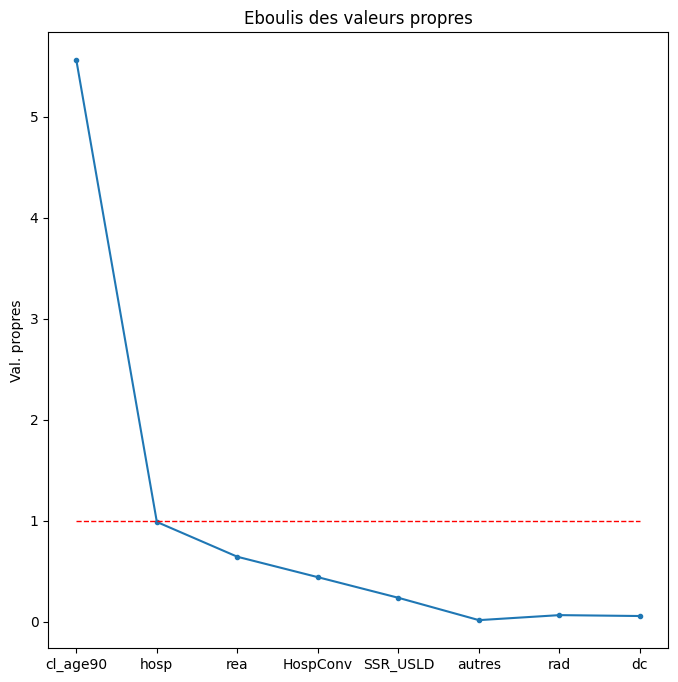

In [29]:
#9- Construire l’éboulis des valeurs propres et commenter
m,n = x.shape
toto=['cl_age90','hosp','rea','HospConv','SSR_USLD','autres','rad','dc']
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(toto,val_propZ,".-")
ax.set_ylabel("Val. propres")
ax.plot([0,len(toto)-1],[1,1],"r--",linewidth=1)
plt.title("Eboulis des valeurs propres")

In [30]:
from fanalysis.pca import PCA

In [31]:
acp = PCA(std_unit=True,row_labels=data2.index,col_labels=data2.columns)

In [32]:
print(dir(acp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'col_labels', 'col_topandas', 'correlation_circle', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'n_components', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_contrib', 'plot_row_cos2', 'row_labels', 'row_topandas', 'set_params', 'stats', 'std_unit', 'transform']


In [33]:
acp.fit(x)

PCA(col_labels=Index(['cl_age90', 'hosp', 'rea', 'HospConv', 'SSR_USLD', 'autres', 'rad',
       'dc'],
      dtype='object'),
    row_labels=Int64Index([ 1, 44, 75,  4, 52,  6,  3, 93, 94, 76,
            ...
            52, 52, 75, 24, 24,  6, 44, 53,  2, 27],
           dtype='int64', name='reg', length=35143))

In [34]:
print(dir(acp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'col_contrib_', 'col_coord_', 'col_cor_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_topandas', 'correlation_circle', 'eig_', 'eigen_vectors_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'means_', 'model_', 'n_components', 'n_components_', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_contrib', 'plot_row_cos2', 'row_contrib_', 'row_coord_'

la qualité de la représentation des individus dans cet espace. on a une fonction prédéfini row_cos2_ dans bibliotheque PCA (ACP) qui calcule COS2 qui désigne la qualité de représentation de l’individu

In [42]:
print(pd.DataFrame(acp.row_cos2_[:,:2],index=data2.index))

            0         1
reg                    
1    0.093372  0.765524
44   0.322508  0.666350
75   0.435624  0.560994
4    0.156557  0.650538
52   0.835052  0.136880
..        ...       ...
6    0.587665  0.000101
44   0.967233  0.003992
53   0.586415  0.000086
2    0.439393  0.536513
27   0.067461  0.204804

[35143 rows x 2 columns]


La contribution de chacun des individus à chaque axe.

In [43]:
print(pd.DataFrame(acp.row_contrib_[:,:2],index=data2.index))

            0             1
reg                        
1    0.000106  4.878524e-03
44   0.000468  5.445456e-03
75   0.000439  3.183991e-03
4    0.000117  2.734232e-03
52   0.000471  4.350431e-04
..        ...           ...
6    0.000153  1.480516e-07
44   0.060027  1.396003e-03
53   0.000138  1.147824e-07
2    0.000682  4.694410e-03
27   0.000068  1.155239e-03

[35143 rows x 2 columns]


le cercle des corrélations.

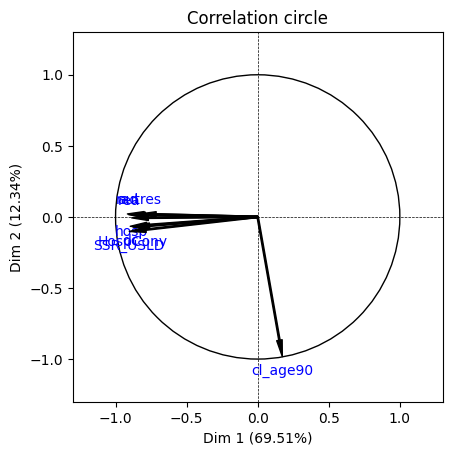

In [44]:
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

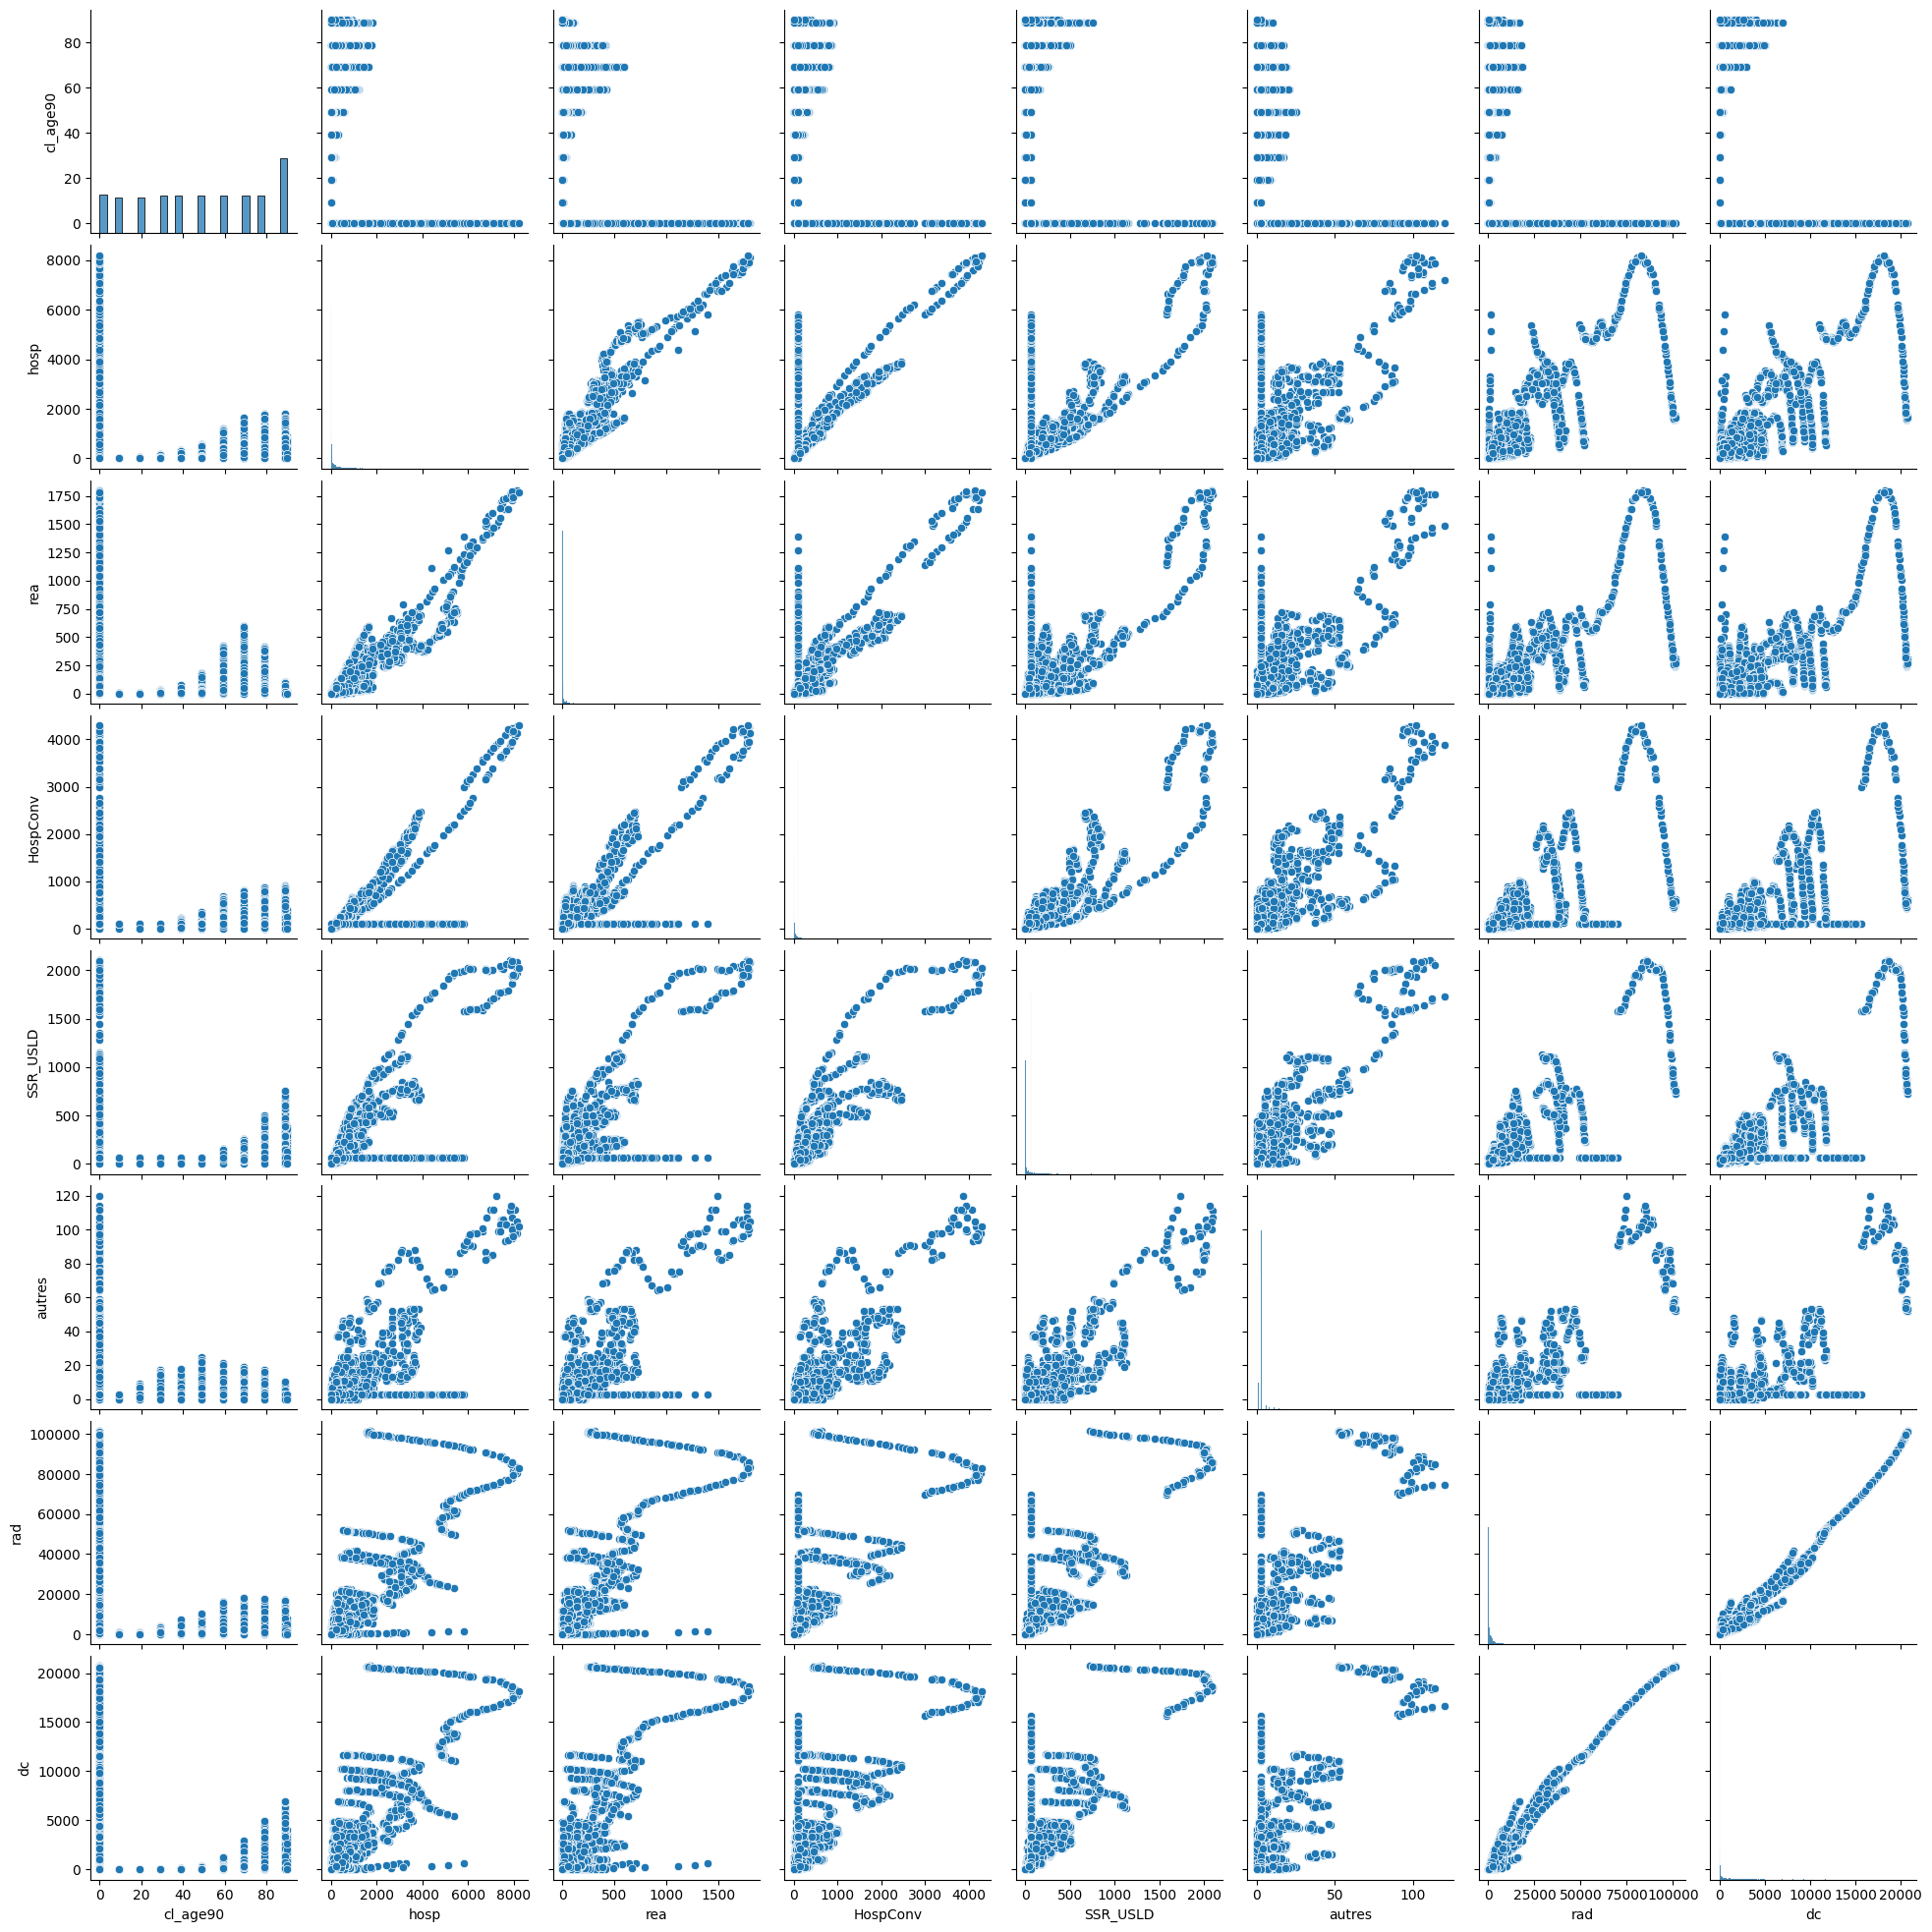

In [47]:
sns.pairplot(data2)

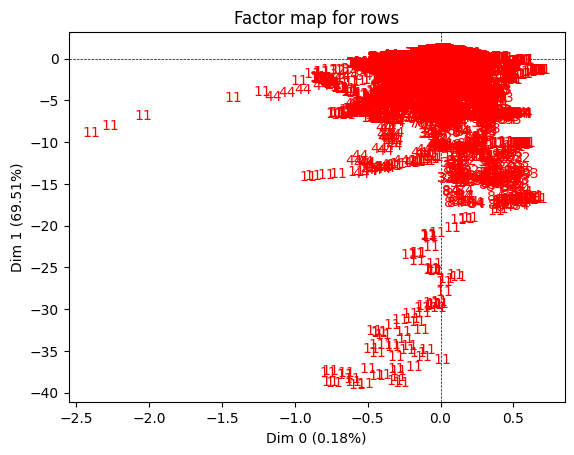

In [48]:
acp.mapping_row(num_x_axis=0,num_y_axis=1)

<AxesSubplot: >

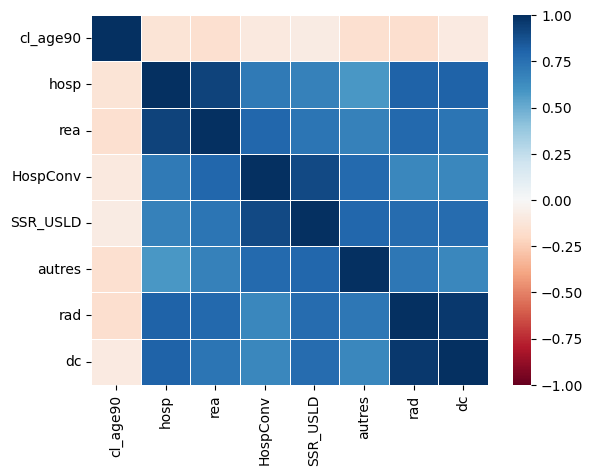

In [51]:
#heatmap pour identifier visuellement les corrélations fortes
sns.heatmap(matX_corr,xticklabels=data2.columns,yticklabels=data2.columns,vmin=-1,vmax=+1,center=0,cmap="RdBu",linewidths=0.5)